## Gradient Descent Assignment
In this assignment, you will implement and experiment with Gradient Descent on a simulated dataset. Your task is to complete the missing sections of the code, understand the role of each part of the algorithm, and tweak the hyperparameters to see their effect.

## Objectives:
Understand and implement the Gradient Descent algorithm.
Visualize how the cost function decreases with iterations.
Tweak learning rates and number of iterations to observe the impact.

## Instructions:
- Complete the code where indicated.
- Run each cell to observe the results.
- Use assert statements to validate your code.



### Part 1: Setting up the Dataset
In this section, we'll import necessary libraries and load the dataset.

In [1]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Simulated real-world dataset with multiple features:
X = np.array([
    [750, 3, 30, 15],
    [850, 3, 25, 12],
    [900, 4, 20, 10],
    [1200, 4, 18, 8],
    [1500, 5, 10, 5],
    [2000, 5, 5, 3],
    [2300, 6, 3, 2],
    [3000, 6, 2, 1],
    [3500, 7, 1, 1],
    [4000, 8, 1, 0]
])  # Features: [Size, Bedrooms, Age, Distance to City Center]

y = np.array([150, 175, 200, 300, 375, 480, 525, 650, 720, 800])  # Price of the house in 1000s of dollars

In this section, we’ll import necessary libraries and load the dataset.

$$ X_{norm} = \frac{X - \mu}{\sigma} $$
 
where mu is the mean and sigma is the standard deviation of the features.

In [3]:
# Normalize features for better convergence
X_norm = (X - X.mean(axis=0)) / X.std(axis=0)
# Add a column of ones to X_norm to account for theta0 (intercept)
X_b = np.c_[np.ones(X_norm.shape[0]), X_norm]  # Add intercept term

### Part 2: Gradient Descent Algorithm
Now, we will implement the Gradient Descent algorithm.

### Useful Equations

$$ Y_{prediction} = f(X) = W.X $$

$$ J (Cost Function) = \frac{1}{2m}  (Y_{prediction}  - Y)^2 $$

$$ \begin{align}
Gradient &(\frac{\partial J(W)}{\partial W}) = \frac{1}{m}  (Y_{prediction} - Y).X\\
\end{align} $$

$$ \begin{align*} 
  W &= W -  \alpha .(\frac{\partial J(W)}{\partial W}) 
  \end{align*} $$

Complete the missing parts of the code below:

In [5]:
# Initialize parameters (weights vector) with zeros
theta = np.zeros(X_b.shape[1])

# Define learning rate and number of iterations
alpha = 0.01  # You can experiment with this
iterations = 1000  # Try changing this value

# Gradient descent function
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)  # Number of training examples
    cost_history = []  # To store the cost at each iteration

    for i in range(iterations):
        # Predicted values 
        y_pred = X.dot(theta)

        # Compute the error (difference between predicted and actual values)
        error = y_pred - y

        # Compute gradients 
        gradients = (1/m) * X.T.dot(error)

        # Update the parameters (theta)
        theta = theta - alpha * gradients 

        # Compute the cost function (Mean Squared Error) and append to history
        cost = (1/(2*m)) * np.sum(error ** 2) 
        cost_history.append(cost)

    return theta, cost_history

In [7]:

# Running the gradient descent function
theta, cost_history = gradient_descent(X_b, y, theta, alpha, iterations)

# Assert statement to check theta shape
assert theta.shape == (X_b.shape[1],), "Theta shape mismatch!"


### Part 3: Visualizing the Cost Function
Let's plot the cost function to observe how it decreases over time.

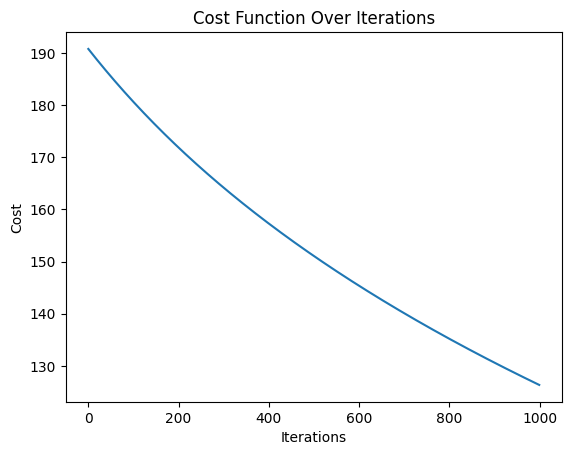

In [8]:
plt.plot(range(iterations), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function Over Iterations')
plt.show()

# Assert to check the final cost decreases
assert cost_history[-1] < cost_history[0], "Cost did not decrease!"


### Part 4: Predictions and Visualization
Now, we'll use the final parameters to make predictions

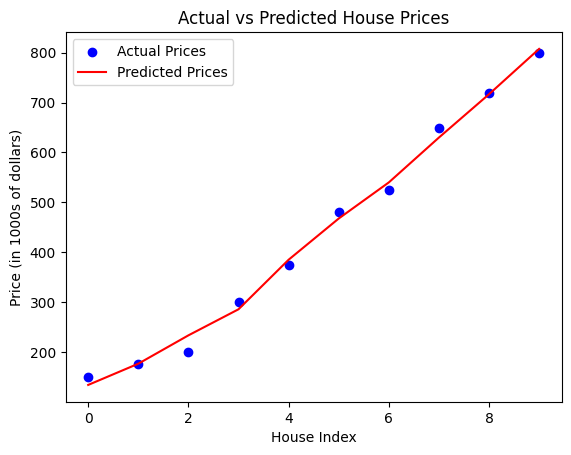

In [9]:
# Predicted prices using the final parameters
y_pred_final = X_b.dot(theta)

# Plotting actual vs predicted prices
plt.scatter(range(len(y)), y, color='blue', label='Actual Prices')
plt.plot(range(len(y)), y_pred_final, color='red', label='Predicted Prices')
plt.xlabel('House Index')
plt.ylabel('Price (in 1000s of dollars)')
plt.title('Actual vs Predicted House Prices')
plt.legend()
plt.show()

# Assert to check predictions length
assert len(y_pred_final) == len(y), "Prediction length mismatch!"

### Part 6: Implementing Gradient Descent on Real-World Data (Ames Housing Dataset)
In this section, you will apply the Gradient Descent algorithm to a real dataset from the Ames Housing dataset. Download the dataset from Kaggle and follow the steps below.

Loading the Dataset


In [10]:
import pandas as pd

# Load dataset
data = pd.read_csv('AmesHousing.csv')

# Display the first few rows to get an understanding of the data
print(data.head())

   Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2   NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
3   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
4   NaN       IR1          Lvl  ...         0     NaN  MnPrv          NaN   

  Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0       

C:\Users\cc\AppData\Local\Temp\ipykernel_2796\2984931400.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Preprocessing the Data(Manually)

In [11]:
# Handling missing values: fill numeric columns with the mean and categorical columns with the mode
for col in data.columns:
    if data[col].dtype == 'object':
        data[col].fillna(data[col].mode()[0], inplace=True)  # Fill with mode for categorical
    else:
        data[col].fillna(data[col].mean(), inplace=True)  # Fill with mean for numeric

# Convert categorical variables using one-hot encoding (manual process)
categorical_cols = data.select_dtypes(include=['object']).columns
data = pd.get_dummies(data, columns=categorical_cols)

# Normalization: Min-Max scaling for all columns
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
data[numeric_cols] = (data[numeric_cols] - data[numeric_cols].min()) / (data[numeric_cols].max() - data[numeric_cols].min())

# Separate features (X) and target (y)
X = data.drop(columns=['SalePrice'])  # Assuming 'SalePrice' is the target variable
y = data['SalePrice'].values.reshape(-1, 1)

# Add a bias term (column of ones) to X for the intercept
import numpy as np
X = np.c_[np.ones(X.shape[0]), X]


C:\Users\cc\AppData\Local\Temp\ipykernel_2796\645629271.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)  # Fill with mean for numeric
C:\Users\cc\AppData\Local\Temp\ipykernel_2796\645629271.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

Implement Gradient Descent

In [12]:
import numpy as np

# Ensure X and y are of type float64
X = np.array(X, dtype=np.float64)
y = np.array(y, dtype=np.float64)

# Add bias term to X
X = np.c_[np.ones(X.shape[0]), X]

# Initialize parameters
theta = np.zeros((X.shape[1], 1))  # Initialize theta to zeros
learning_rate = 0.01
iterations = 1000
m = len(y)  # Number of training examples

# Hypothesis function
def predict(X, theta):
    return np.dot(X, theta)

# Cost function (Mean Squared Error)
def compute_cost(X, y, theta):
    predictions = predict(X, theta)
    return (1 / (2 * m)) * np.sum((predictions - y) ** 2)

# Gradient Descent
def gradient_descent(X, y, theta, learning_rate, iterations):
    cost_history = []

    for i in range(iterations):
        predictions = predict(X, theta)
        errors = predictions - y
        theta -= (learning_rate / m) * np.dot(X.T, errors)
        
        # Record the cost for each iteration
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)
        
        # Optionally, print cost to monitor progress
        if i % 100 == 0:
            print(f"Iteration {i}, Cost: {cost}")
    
    return theta, cost_history

# Run Gradient Descent
theta, cost_history = gradient_descent(X, y, theta, learning_rate, iterations)

# Final cost
print(f"Final cost: {compute_cost(X, y, theta)}")



Iteration 0, Cost: 0.016429917591520026
Iteration 100, Cost: 0.0021898402367164184
Iteration 200, Cost: 0.0016809379650809277
Iteration 300, Cost: 0.00142549708035429
Iteration 400, Cost: 0.0012753245406010559
Iteration 500, Cost: 0.0011773186435837313
Iteration 600, Cost: 0.0011075592344917196
Iteration 700, Cost: 0.001054482667464824
Iteration 800, Cost: 0.0010121016984170996
Iteration 900, Cost: 0.0009770829383914878
Final cost: 0.0009477044515121349


Visualize the Cost Function

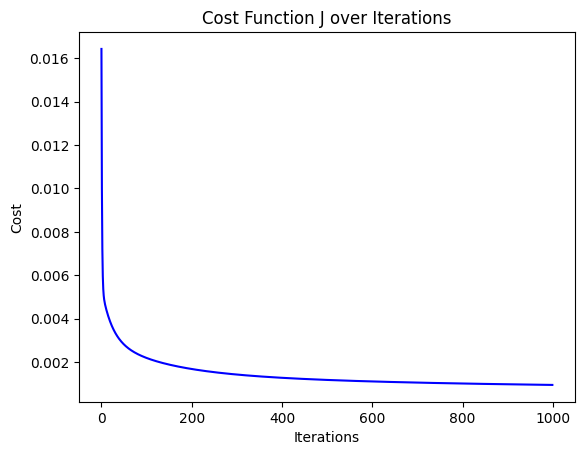

In [13]:
import matplotlib.pyplot as plt

plt.plot(range(len(cost_history)), cost_history, 'b')
plt.title('Cost Function J over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()


Predictions and Visualisations


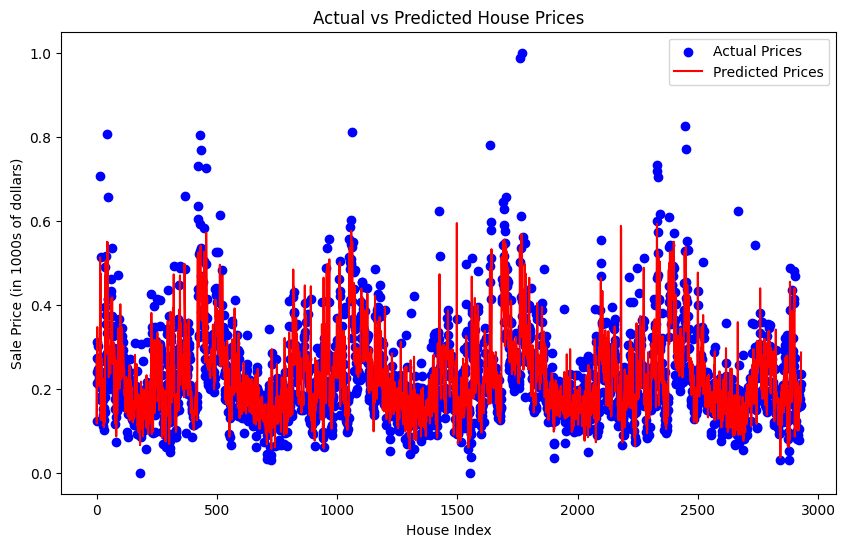

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Predicted prices using the final parameters (theta)
y_pred_final = np.dot(X, theta)  # X contains the bias term

# Plotting actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y)), y, color='blue', label='Actual Prices')  # Actual house prices
plt.plot(range(len(y)), y_pred_final, color='red', label='Predicted Prices')  # Predicted house prices
plt.xlabel('House Index')
plt.ylabel('Sale Price (in 1000s of dollars)')
plt.title('Actual vs Predicted House Prices')
plt.legend()
plt.show()

# Assert to check predictions length
assert len(y_pred_final) == len(y), "Prediction length mismatch!"


## Instructions:
Load the dataset and manually preprocess the data without using any third-party libraries like sklearn.
Implement the Gradient Descent algorithm as you did for the simulated data.
Visualize the cost function and make predictions.
Experiment with hyperparameters and observe their effects.

## Loading and Preprocessing the Dataset (Manual Processing)

In [ ]:
''''import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
# Assuming the dataset is downloaded and named 'train.csv'
df = pd.read_csv('train.csv')

# Select a few features (you can try different sets of features)

## Select Features by your own choice
features = []
target = 'SalePrice'

# Extracting features and target
X_real = df[features].values
y_real = df[target].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_real, y_real, test_size=0.2, random_state=42)

# Normalize features for better convergence
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Add a column of ones for the intercept term
X_train_b = ___________
''''

## Implementing Gradient Descent for Real-World Data

In [21]:
import numpy as np

# Ensure X and y are of type float64
X = np.array(X, dtype=np.float64)
y = np.array(y, dtype=np.float64)

# Add bias term to X
X = np.c_[np.ones(X.shape[0]), X]

# Initialize parameters
theta = np.zeros((X.shape[1], 1))  # Initialize theta to zeros
learning_rate = 0.01
iterations = 1000
m = len(y)  # Number of training examples

# Hypothesis function
def predict(X, theta):
    return np.dot(X, theta)

# Cost function (Mean Squared Error)
def compute_cost(X, y, theta):
    predictions = predict(X, theta)
    return (1 / (2 * m)) * np.sum((predictions - y) ** 2)

# Gradient Descent
def gradient_descent(X, y, theta, learning_rate, iterations):
    cost_history = []

    for i in range(iterations):
        predictions = predict(X, theta)
        errors = predictions - y
        theta -= (learning_rate / m) * np.dot(X.T, errors)
        
        # Record the cost for each iteration
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)
        
        # Optionally, print cost to monitor progress
        if i % 100 == 0:
            print(f"Iteration {i}, Cost: {cost}")
    
    return theta, cost_history

# Run Gradient Descent
theta, cost_history = gradient_descent(X, y, theta, learning_rate, iterations)

# Final cost
print(f"Final cost: {compute_cost(X, y, theta)}")



Iteration 0, Cost: 0.016098876489086027
Iteration 100, Cost: 0.0021873686829672803
Iteration 200, Cost: 0.0016799742583703968
Iteration 300, Cost: 0.0014253911036083361
Iteration 400, Cost: 0.00127567719023616
Iteration 500, Cost: 0.0011779123234872562
Iteration 600, Cost: 0.0011082742333102657
Iteration 700, Cost: 0.0010552518535444668
Iteration 800, Cost: 0.0010128866837731286
Iteration 900, Cost: 0.0009778614718424661
Final cost: 0.0009484638537825103


## Visualizing the Cost Function for Real Data

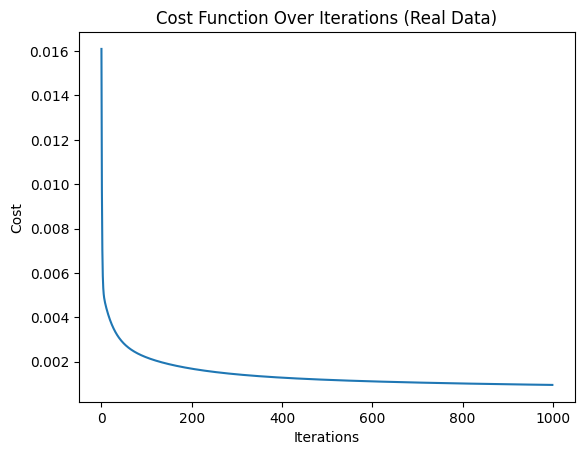

In [25]:

# Plotting the cost function over iterations for real data
plt.plot(range(iterations), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function Over Iterations (Real Data)')
plt.show()

# Assert to check cost reduction
assert cost_history[-1] < cost_history[0], "Cost did not decrease for real data!"

## Making Predictions on Real Data
Once the model has been trained, we can now make predictions on the test set.

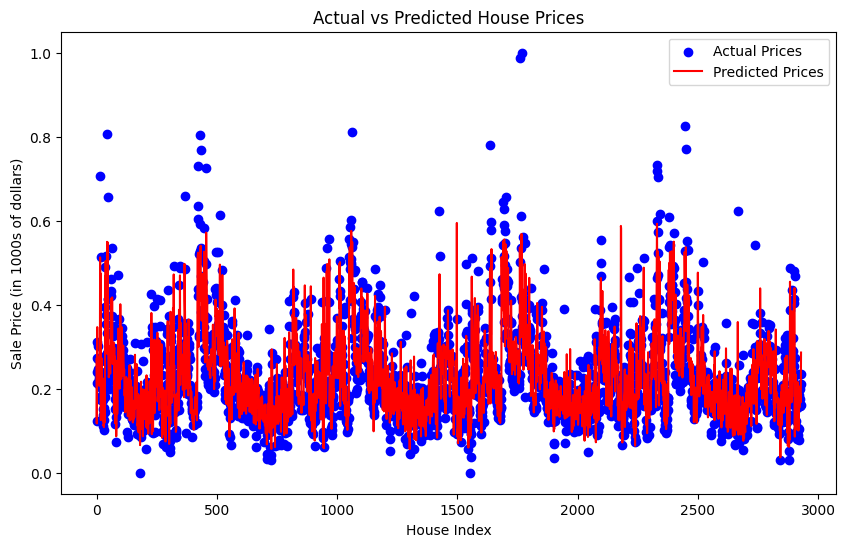

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Predicted prices using the final parameters (theta)
y_pred_final = np.dot(X, theta)  # X contains the bias term

# Plotting actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y)), y, color='blue', label='Actual Prices')  # Actual house prices
plt.plot(range(len(y)), y_pred_final, color='red', label='Predicted Prices')  # Predicted house prices
plt.xlabel('House Index')
plt.ylabel('Sale Price (in 1000s of dollars)')
plt.title('Actual vs Predicted House Prices')
plt.legend()
plt.show()

# Assert to check predictions length
assert len(y_pred_final) == len(y), "Prediction length mismatch!"


## Part 7: Experimenting with Hyperparameters for Real Data
You can now experiment with different learning rates and iterations to observe their effects on the model.

### Tasks:

Run the Gradient Descent with alpha=0.001, alpha=0.1, and alpha=0.05. Record the final cost and observe the impact of the learning rate.
Try using different sets of features from the dataset. For example, you can add more features or remove certain features and see how the model's performance changes.

Function to run gradient descent with different learning rates


Running Gradient Descent with learning rate 0.001
Iteration 0, Cost: 0.029630046431156156
Iteration 100, Cost: 0.004577946211857804
Iteration 200, Cost: 0.0038818638022716147
Iteration 300, Cost: 0.00341355189363844
Iteration 400, Cost: 0.003080289831628513
Iteration 500, Cost: 0.002835617867444733
Iteration 600, Cost: 0.0026497627568746133
Iteration 700, Cost: 0.002503572624584666
Iteration 800, Cost: 0.0023846697568907227
Iteration 900, Cost: 0.002285002759526478

Running Gradient Descent with learning rate 0.1
Iteration 0, Cost: 0.1635334812492781
Iteration 100, Cost: 1.3279044258410138e+78
Iteration 200, Cost: 1.1086131347143246e+157
Iteration 300, Cost: 9.255357980170398e+235


C:\Users\cc\AppData\Local\Temp\ipykernel_8744\774157644.py:23: RuntimeWarning: overflow encountered in square
  return (1 / (2 * m)) * np.sum((predictions - y) ** 2)


Iteration 400, Cost: inf
Iteration 500, Cost: inf
Iteration 600, Cost: inf
Iteration 700, Cost: inf
Iteration 800, Cost: nan
Iteration 900, Cost: nan

Running Gradient Descent with learning rate 0.05
Iteration 0, Cost: 0.0191594807763105
Iteration 100, Cost: 0.0011727439434783703
Iteration 200, Cost: 0.0009459327123439684
Iteration 300, Cost: 0.0008454871600341654
Iteration 400, Cost: 0.0007856265264676584
Iteration 500, Cost: 0.0007455405771515627
Iteration 600, Cost: 0.0007168512343484246
Iteration 700, Cost: 0.0006953608514057936
Iteration 800, Cost: 0.0006786877055827206
Iteration 900, Cost: 0.0006653733181873839


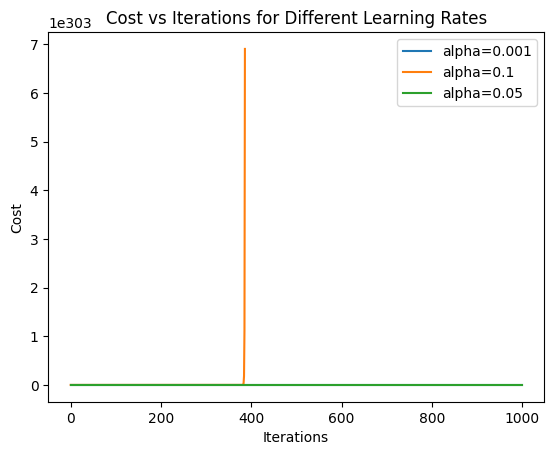

In [16]:
def experiment_with_learning_rates(X, y, initial_theta, iterations=1000):
    learning_rates = [0.001, 0.1, 0.05]
    results = {}

    for lr in learning_rates:
        print(f"\nRunning Gradient Descent with learning rate {lr}")
        theta = np.copy(initial_theta)  # Reset theta for each run
        theta, cost_history = gradient_descent(X, y, theta, learning_rate=lr, iterations=iterations)
        final_cost = compute_cost(X, y, theta)
        results[lr] = (theta, final_cost, cost_history)

        # Plotting the cost history for each learning rate
        plt.plot(cost_history, label=f"alpha={lr}")

    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title('Cost vs Iterations for Different Learning Rates')
    plt.legend()
    plt.show()

    return results
# Running the experiments with learning rates
initial_theta = np.zeros((X.shape[1], 1))
results = experiment_with_learning_rates(X, y, initial_theta, iterations=1000)

# Function to add or remove features and experiment with model performance

Iteration 0, Cost: 0.02969349711524038
Iteration 100, Cost: 0.006074083392645636
Iteration 200, Cost: 0.005899377294662813
Iteration 300, Cost: 0.005782692283714398
Iteration 400, Cost: 0.005694434812287091
Iteration 500, Cost: 0.005627488586814214
Iteration 600, Cost: 0.005576550646268128
Iteration 700, Cost: 0.005537657050500768
Iteration 800, Cost: 0.005507842420580744
Iteration 900, Cost: 0.0054848863310978995
Final cost with selected features: 0.005467280655129103


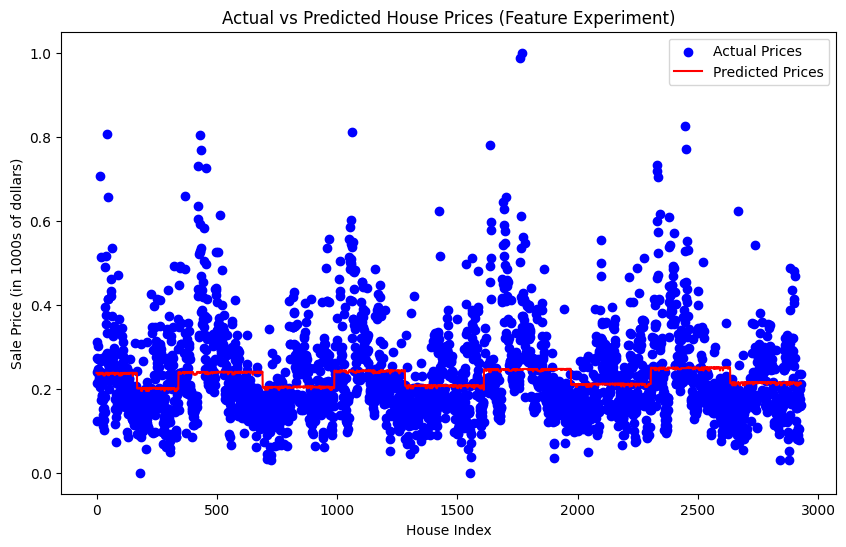

In [17]:
def experiment_with_features(X, y, features_to_use, learning_rate=0.01, iterations=1000):
    X_new = X[:, features_to_use]  # Select specific features
    X_new = np.c_[np.ones(X_new.shape[0]), X_new]  # Add bias term
    
    theta = np.zeros((X_new.shape[1], 1))  # Initialize theta
    theta, cost_history = gradient_descent(X_new, y, theta, learning_rate, iterations)
    final_cost = compute_cost(X_new, y, theta)

    print(f"Final cost with selected features: {final_cost}")

    # Visualize actual vs predicted prices
    y_pred_final = np.dot(X_new, theta)
    plt.figure(figsize=(10, 6))
    plt.scatter(range(len(y)), y, color='blue', label='Actual Prices')
    plt.plot(range(len(y)), y_pred_final, color='red', label='Predicted Prices')
    plt.xlabel('House Index')
    plt.ylabel('Sale Price (in 1000s of dollars)')
    plt.title('Actual vs Predicted House Prices (Feature Experiment)')
    plt.legend()
    plt.show()

# Experiment with specific features (e.g., use first 5 features)
features_to_use = [0, 1, 2, 3, 4]  # Select features by column index
experiment_with_features(X, y, features_to_use, learning_rate=0.01, iterations=1000)

### Final Note on Gradient Descent
Gradient Descent is an optimization algorithm used to minimize the cost function in machine learning by iteratively adjusting model parameters. The algorithm calculates the gradient (slope) of the cost function and updates the parameters in the direction that reduces the error.

- Learning Rate (α) controls the size of steps taken towards the minimum.
- Iterations determine how many times the parameters are updated.
- Convergence is reached when changes in the cost become negligible.

Gradient Descent has variants like Batch, Stochastic, and Mini-Batch, each balancing between computation time and convergence stability. It is widely used in linear regression, neural networks, and more, making it essential for optimizing machine learning models.